## K-means

In [3]:
import time
import sys
! pip install numpy
import numpy as np
! pip install matplotlib
import matplotlib.pyplot as plt

import math
import os
from matplotlib.pyplot import imread
# from mpl_toolkits.mplot3d import Axes3D #This is for 3d scatter plots.

import cv2
import functools
from sklearn.decomposition import PCA



These programming exercises will focus on K-means clustering. 

If you're unsure of how k-means works, read this very helpful and freely available online breakdown from Stanford's CS221 course; https://stanford.edu/~cpiech/cs221/handouts/kmeans.html


In [5]:
train_images = []
path = "../output"
for file in os.listdir(path):
    if file.endswith(".jpg"):
        im = cv2.imread(path + "/" + file)
        y = list(im.ravel())
        y = np.array(y)
        #im =imread(path + "/" + file)
        train_images.append(y)
# plt.imshow(train_images[0])  #not using since it is 1D array
# plt.show()
train_images[0]

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [6]:
#X = np.load("./data.npy")
X = np.array(train_images)
m,n = X.shape
pca = PCA(n_components = min(m,n),random_state=2023)
Y = X.T
pca.fit(X)


# k=4

PCA(copy=True, iterated_power='auto', n_components=496, random_state=2023,
    svd_solver='auto', tol=0.0, whiten=False)

In [7]:
X_pca = pca.transform(X)
print(X_pca.shape)
X= X_pca

(496, 496)



K-means is a special, simple case of the Expectation Maximisation (EM) algorithm.

This simplified EM (k-means), is divided into two steps.

The **E-Step**, where for every sample in your dataset you find which "centroid" that datapoint is closest to that sample, and record that information.

The **M-Step**, where you move each "centroid" to the center of the samples which were found to be closest to it in the **E-Step**.

Each *centroid* is simply an estimated mean of a cluster. If you have $1$ centroid, then this centroid will become the mean of all your data.

Centroids are initially random values, and the k-means algorithm attempts to modify them so that each one represents the center of a cluster.

We have implemented a centroids initialization function.

In [8]:
from random import sample
def initialise_parameters(m, X):
    C = sample(list(X), k=m)
    return np.array(C)

# C = initialise_parameters(4, X)
# print(C)




---
   **1.1:** $E\_step(C, X) = L$, where $L$ is a matrix of the same dimension of the dataset $X$.
   
   This function is is the **E-Step** 

---

In [9]:
def distance(centre,sample):
    return(math.sqrt(np.sum((centre-sample)**2)))
#     return(math.sqrt((centre[0]-sample[0])**2+(centre[1]-sample[1])**2))
def E_step(C, X):
    L = np.zeros(X.shape)
    for i in range(0, X.shape[0]):
        ags = np.argmin(np.linalg.norm(C - X[i], axis = 1))
        L[i] = C[ags]
    return L
# L = E_step(C, X)/

# fig = plt.figure(figsize=(16, 10))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(L[:, 0], L[:, 1],L[:,2"])
# plt.show()
# print(L)

**TASK 1.2:** Create a function $M\_step(C, X, L) = C$ which returns $C$ modified so that each centroid in $C$ is placed in the middle of the samples assigned to it. This is the **M-Step**.

In other words, make each centroid in $C$ the average of all the samples which were found to be closest to it during the **E-step**. This is also called the "update step" for K-means.

---

**HINT:** https://docs.scipy.org/doc/numpy/reference/generated/numpy.array_equal.html

In [10]:
def M_step(C, X, L):
    new_C = np.zeros(C.shape)
    for i in range(0, C.shape[0]):
        centroid = C[i]
        count = np.count_nonzero(np.all(L == centroid, axis = 1))
        new_C[i] = np.sum(X[np.all(L == C[i], axis = 1)], axis = 0) / count
    return new_C

# print('Before:')
# print(C)
# print('\nAfter:')
# new_C = M_step(C, X, L)
# print(new_C)

Implement $kmeans(X, m, threshold) = C, L$ which takes a dataset $X$ (of any dimension) and a scalar value $m$ and a scalar $threshold$ as input. 

In [11]:

def kmeans(X, m, threshold):
    L = np.zeros(X.shape)
    C = initialise_parameters(m, X)
    diff = float('inf')
    loss_prev = float('inf')
    while diff > threshold:
        L = E_step(C, X)
        loss_cur = np.sum((np.linalg.norm(X - L, axis=1)**2))
        diff = abs(loss_prev - loss_cur)
        loss_prev = loss_cur
        C = M_step(C, X, L)
    # due to the fact that we pair the data point and cluster centroid
    # by the value in L match the value in C, we need to do E_step one more time
    L = E_step(C, X)
    return C, L

# C_final, L_final = kmeans(X, k, 1e-6)

print('Done')
# print(C_final)
def allocator(X, L, c):
    cluster = []
    for i in range(L.shape[0]):
        if np.array_equal(L[i, :], c):
            cluster.append(X[i, :])
    return np.asarray(cluster)


Done


In [12]:
def evaluation(X, L_final, C_final):
    length = 0
    total_distance = 0 #evaluation
    density = 0
    for i in range(k):
        cluster = allocator(X, L_final, C_final[i, :])
#         print("the "+str(i)+" cluster is: "+str(cluster[:,i]))
        length += len(cluster)
        for d in range(cluster.shape[0]):
            total_distance += distance(C_final[i,:],cluster[d,:])
        density += total_distance/len(cluster)
    density = total_distance/k
    return length,total_distance,density
# length,total_distance = evaluation(X, L_final, C_final)
# print("sum "+str(length))
# print("The distance is "+ str(total_distance))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

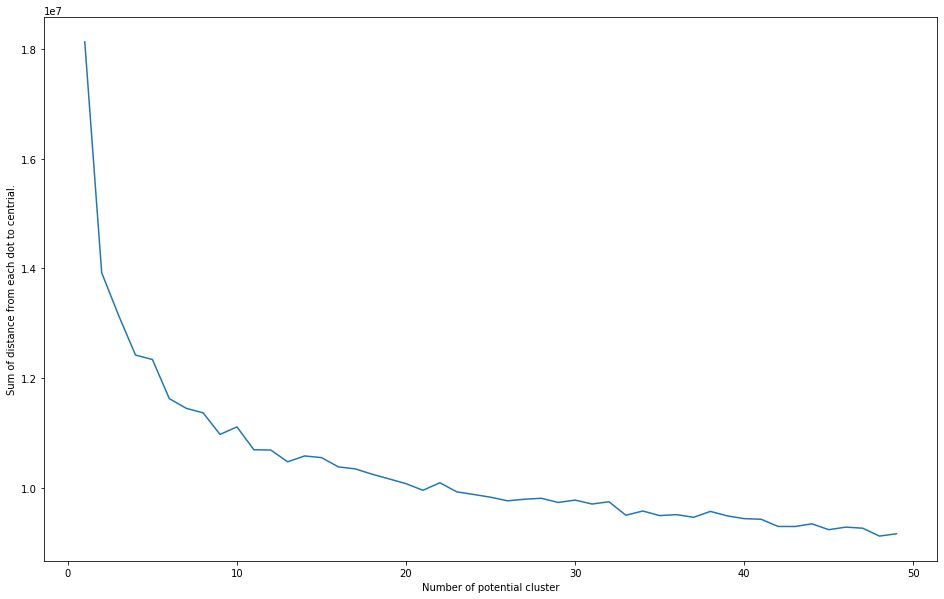

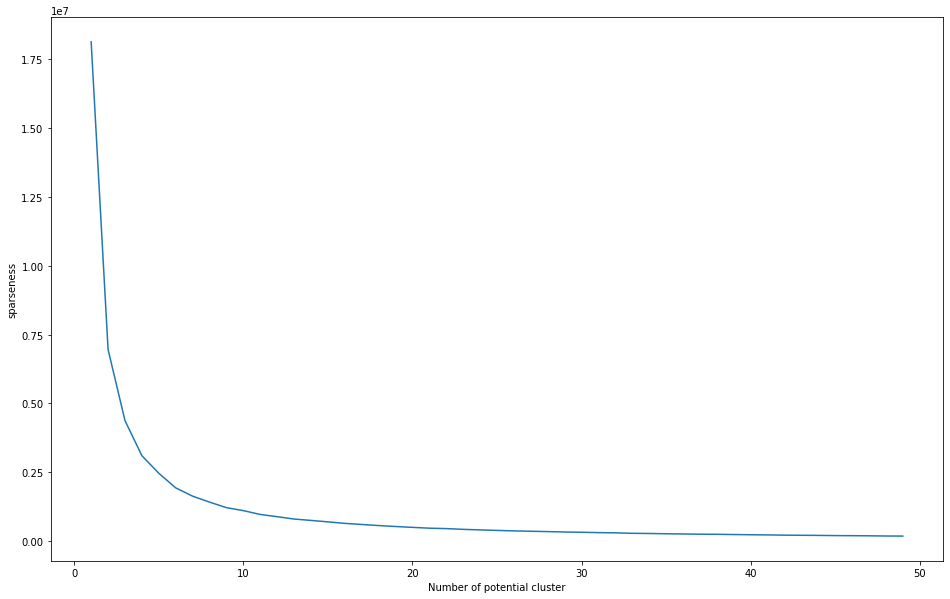

In [13]:
xaxis = []
yaxis = []
densityaxis = []
wrongtimes = 0
for i in range(1,50):
    xaxis.append(i)
    k = i
    C_final, L_final = kmeans(X, k, 1e-6)
    length,total_distance,density = evaluation(X, L_final, C_final)
    yaxis.append(total_distance)
    densityaxis.append(density)
    print(k,end = " ")
    if(length!=X.shape[0]):
        print("Error, when i = "+str(i)+" the clusters start overlapping: "+str(length))
        wrongtimes += 1
    else:
        wrongtimes = 0
    
    if(wrongtimes>=5):
        break
        
fig = plt.figure(figsize=(16, 10))
plt.plot(xaxis,yaxis)
plt.xlabel("Number of potential cluster")
plt.ylabel("Sum of distance from each dot to centrial.")
plt.show()
fig = plt.figure(figsize=(16, 10))
plt.plot(xaxis,densityaxis)
plt.xlabel("Number of potential cluster")
plt.ylabel("sparseness")
plt.show()

In [14]:
import pandas as pd
darray = np.array(densityaxis) # start at cluster 1
outcome = np.zeros(darray.shape[0]-1) 
for i in range(outcome.shape[0]): #start at cluster 2
    outcome[i] = (darray[i+1] - darray[i])/darray[i]
outcome = outcome.tolist()

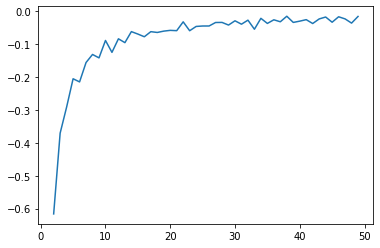

In [15]:
plt.plot(xaxis[1:],outcome)

In [63]:
# one time cluster


k=10 # Use this to see the cluster circumstance in specific cluster number



C_f, L_f = kmeans(X, k, 1e-6)
total_img = []
def allocator2(X,L, c):
    cluster = []
    idlist = []
    for i in range(L.shape[0]):
        if np.array_equal(L[i, :], c):
            cluster.append(X[i, :])
            idlist.append(i)
    return idlist
for i in range(k):
#     print("In cluster: "+str(i))
    idlist = allocator2(X,L_f,C_f[i, :])
#     print(idlist)
    total_img.append(np.array(idlist))
    
total_img = np.array(total_img)

# index of images
print("clusters: ")
print(total_img)

clusters: 
[array([ 21,  22,  23, 123, 124, 125, 126, 185, 230, 231, 264, 267, 294,
        312, 313, 314, 315, 326, 327, 328, 329, 351, 352, 353, 354, 355,
        362, 364, 368, 369, 370, 371, 378, 379, 380, 381, 385, 386, 387,
        388, 394, 396, 397, 398, 399, 400, 402, 406, 407, 408, 410, 411,
        412, 413, 414, 418, 430, 431, 432, 433, 447, 461, 473, 488])
 array([ 13,  14,  42,  56, 135, 150, 163, 245, 246, 289, 292, 310, 434,
        435, 449, 451, 479])
 array([  0,   3,   4,   5,   6,   8,  16,  31,  83,  94, 120, 141, 144,
        152, 153, 158, 208, 228, 229, 234, 235, 238, 284, 296, 304, 311,
        319, 320, 323, 324, 325, 330, 331, 333, 339, 340, 342, 343, 344,
        357, 358, 361, 367, 374, 375, 376, 377, 382, 390, 405, 416, 417,
        436, 453, 459, 463, 465, 467, 469])
 array([  2,   9,  10,  11,  12,  15,  24,  25,  26,  27,  36,  37,  38,
         39,  47,  48,  49,  50,  58,  59,  60,  61,  76,  77,  78,  79,
         87,  88,  89,  90, 108, 109, 110, 1

C:\Users\jinpaiduizhang\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [62]:

def showimg(x): #show one image
    i = 0 # file 0 is a directory created by ipynb.
    for file in os.listdir(path):
        if file.endswith(".jpg"):
            if(x == i): 
                im = cv2.imread(path + "/" +file)
                print(str(file))
                break
            else:
                i += 1
    return im
def see_a_cluster(total_img, x):
    for i in total_img[x]:
        showimg(i)

# see the first cluster    
see_a_cluster(total_img,0) #(0 is index of cluster, change it to see different cluster)


J03.jpg
J100-4.jpg
J107-1.jpg
J107-3.jpg
J113-4.jpg
J118-1.jpg
J118-3.jpg
J121-1.jpg
J121-4.jpg
J130-1.jpg
J130-2.jpg
J147-1.jpg
J147-2.jpg
J147-3.jpg
J147-4.jpg
J155-1.jpg
J155-4.jpg
J163-2.jpg
J163-3.jpg
J168-1.jpg
J168-2.jpg
J168-3.jpg
J168-4.jpg
J172-1.jpg
J172-3.jpg
J172-4.jpg
J175-2.jpg
J175-4.jpg
J177-1.jpg
J178-1.jpg
J178-3.jpg
J178-4.jpg
J181-1.jpg
J181-2.jpg
J256-1.jpg
J256-2.jpg
